<a href="https://colab.research.google.com/github/rahmatullayli/pendata/blob/main/decision_tree_manual_dan_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Decision Tree (Manual dan Sklearn)

## 1. Dataset dan Hitungan Manual Information Gain

Kita gunakan 15 data dengan 2 fitur (Outlook, Humidity) dan target Class (Yes/No).

In [ ]:
import pandas as pd

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain', 'Sunny'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High', 'High'],
    'Class': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No']
}
df = pd.DataFrame(data)
df

,Outlook,Humidity,Class
0,Sunny,High,No
1,Sunny,High,No
2,Overcast,High,Yes
3,Rain,High,Yes
4,Rain,Normal,Yes
5,Rain,Normal,No
6,Overcast,Normal,Yes
7,Sunny,High,No
8,Sunny,Normal,Yes
9,Rain,Normal,Yes


## 2. Bandingkan dengan Sklearn - DecisionTreeClassifier

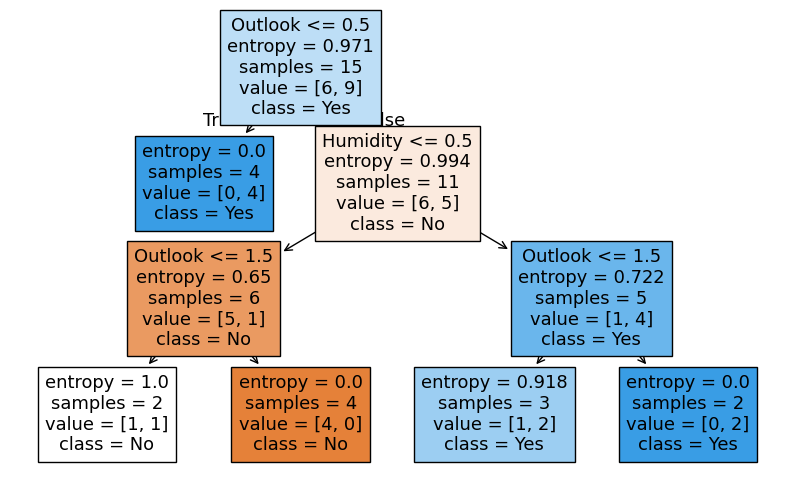

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Encode
le = LabelEncoder()
df['Outlook_enc'] = le.fit_transform(df['Outlook'])
df['Humidity_enc'] = le.fit_transform(df['Humidity'])
df['Class_enc'] = le.fit_transform(df['Class'])

# Split
X = df[['Outlook_enc', 'Humidity_enc']]
y = df['Class_enc']

# Train
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

# Visualisasi
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['Outlook', 'Humidity'], class_names=['No', 'Yes'], filled=True)
plt.show()

## 3. Pohon Keputusan dan Aturan + Prediksi Data Baru

In [ ]:
# Prediksi 2 data baru
sample1 = [[1, 0]]  # Outlook=Sunny, Humidity=Normal
sample2 = [[0, 1]]  # Outlook=Overcast, Humidity=High

pred1 = model.predict(sample1)[0]
pred2 = model.predict(sample2)[0]

print(f'Sample 1 Predicted Class: {le.inverse_transform([pred1])[0]}')
print(f'Sample 2 Predicted Class: {le.inverse_transform([pred2])[0]}')

Sample 1 Predicted Class: No
Sample 2 Predicted Class: Yes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
